In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/CUSTOMER_CHURN_PREDICTION/Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Step 2: Preprocess the data
# Drop unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Geography'] = label_encoder.fit_transform(data['Geography'])

# Split the data into features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [ ]:
# Store results
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    results[model_name] = {
        "accuracy": accuracy,
        "conf_matrix": conf_matrix,
        "class_report": class_report
    }

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 60)



Model: Logistic Regression
Accuracy: 0.815
Confusion Matrix:
 [[1559   48]
 [ 322   71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

------------------------------------------------------------
Model: Random Forest
Accuracy: 0.864
Confusion Matrix:
 [[1545   62]
 [ 210  183]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

------------------------------------------------------------
Mode

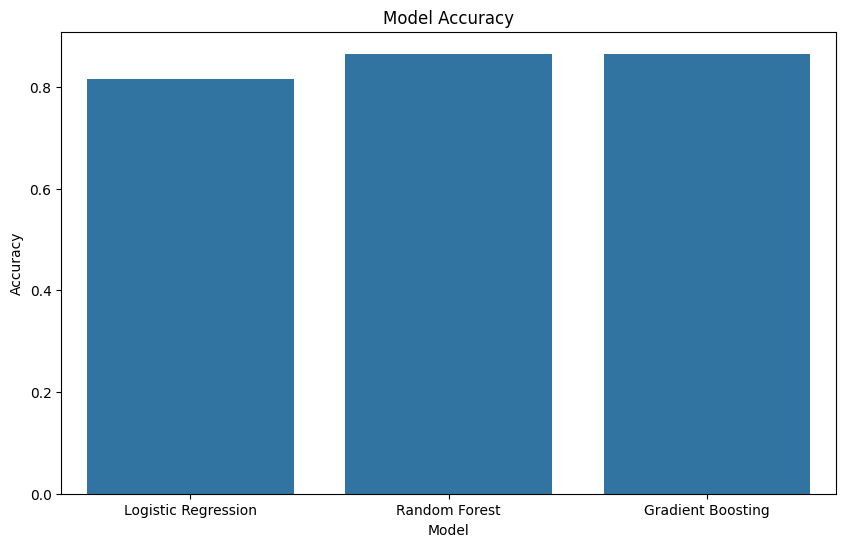

In [ ]:
# Plot the accuracy of each model
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

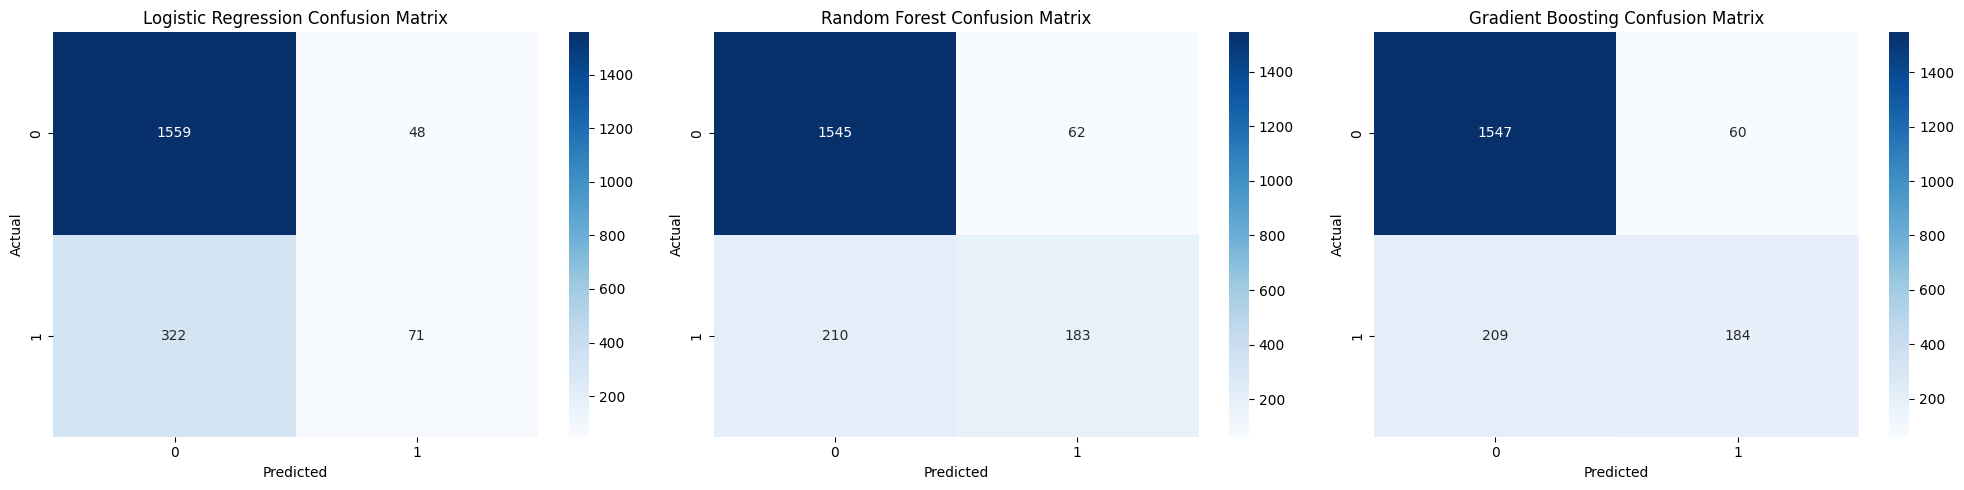

In [ ]:
# Plot the confusion matrix for each model
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for ax, model_name in zip(axes, model_names):
    conf_matrix = results[model_name]['conf_matrix']
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()